#Pengolahan Citra Digital
##Uji Kesegaran buah anggur

#Import Library

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


#Gathering Data

In [15]:
def load_images_from_folder(folder):
  images = []
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
      images.append(img)
  return images

dataset_images = load_images_from_folder('dataset')


#Preprocessing

In [16]:
def resize_images_and_save(images, output_folder, new_width, new_height):
  if not os.path.exists(output_folder):
    os.makedirs(output_folder)

  for i, img in enumerate(images):
    resized_img = cv2.resize(img, (new_width, new_height))
    cv2.imwrite(os.path.join(output_folder, f"resized_anggur_{i}.jpg"), resized_img)


# Contoh penggunaan:
new_width = 256
new_height = 256
output_folder = "resized_dataset"
resize_images_and_save(dataset_images, output_folder, new_width, new_height)


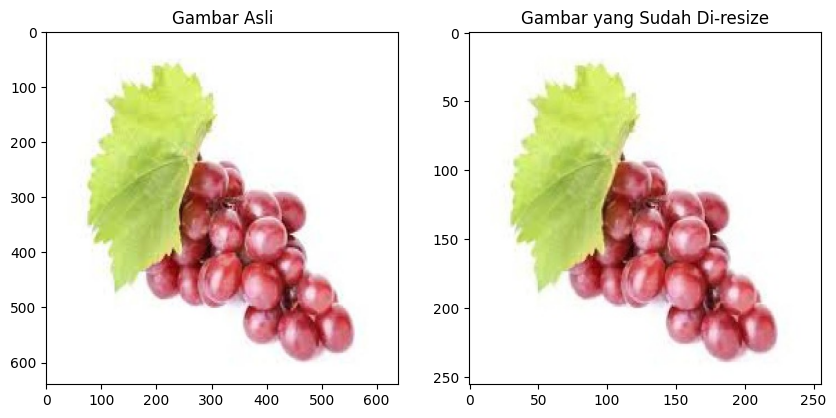

In [17]:
# Memuat gambar asli dan gambar yang sudah di-resize
original_image = dataset_images[0]  # Contoh gambar asli
resized_image = cv2.imread(os.path.join(output_folder, "resized_anggur_0.jpg"))  # Contoh gambar yang sudah di-resize


# Menampilkan gambar asli dan gambar yang sudah di-resize dalam satu plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Gambar Asli")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("Gambar yang Sudah Di-resize")

plt.show()


#Segmentasi

In [18]:
def segmentasi_citra(image, threshold):
  """
  Melakukan segmentasi citra dengan mengubahnya menjadi citra biner berdasarkan threshold.

  Args:
    image: Citra yang akan disegmentasi.
    threshold: Nilai ambang untuk segmentasi.

  Returns:
    Citra biner hasil segmentasi.
  """
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
  return binary_image

# Contoh penggunaan:
threshold_value = 127  # Ganti dengan nilai ambang yang diinginkan
resized_images = load_images_from_folder('resized_dataset')
segmented_images = []

for image in resized_images:
  segmented_image = segmentasi_citra(image, threshold_value)
  segmented_images.append(segmented_image)

# Simpan citra yang telah disegmentasi (opsional)
output_folder_segmented = "segmented_dataset"
if not os.path.exists(output_folder_segmented):
  os.makedirs(output_folder_segmented)

for i, img in enumerate(segmented_images):
  cv2.imwrite(os.path.join(output_folder_segmented, f"segmented_anggur_{i}.jpg"), img)


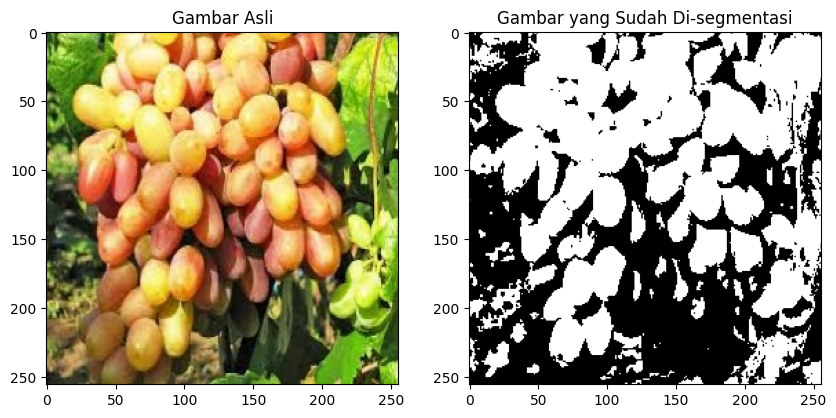

In [19]:
# Menampilkan gambar asli dan gambar yang sudah disegmentasi dalam satu plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(resized_images[0], cv2.COLOR_BGR2RGB))
plt.title("Gambar Asli")

plt.subplot(1, 2, 2)
plt.imshow(segmented_images[0], cmap='gray')
plt.title("Gambar yang Sudah Di-segmentasi")

plt.show()


#Ekstraksi Fitur

In [20]:
def ekstraksi_fitur_rgb_hsv(images):
  """
  Melakukan ekstraksi fitur RGB dan HSV dari daftar citra.

  Args:
    images: Daftar citra yang akan diekstrak fiturnya.

  Returns:
    DataFrame pandas yang berisi fitur RGB dan HSV untuk setiap citra.
  """

  fitur_data = []
  for image in images:
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Hitung rata-rata nilai RGB dan HSV
    average_bgr = np.mean(image, axis=(0, 1))
    average_hsv = np.mean(hsv_image, axis=(0, 1))

    # Tambahkan fitur ke daftar
    fitur_data.append([*average_bgr, *average_hsv])

  # Buat DataFrame pandas dari data fitur
  df = pd.DataFrame(fitur_data, columns=['R', 'G', 'B', 'H', 'S', 'V'])
  return df


# Ekstrak fitur dari citra yang telah disegmentasi
fitur_df = ekstraksi_fitur_rgb_hsv(resized_images)


# Simpan data fitur ke file CSV
fitur_df.to_csv("fitur_anggur.csv", index=False)


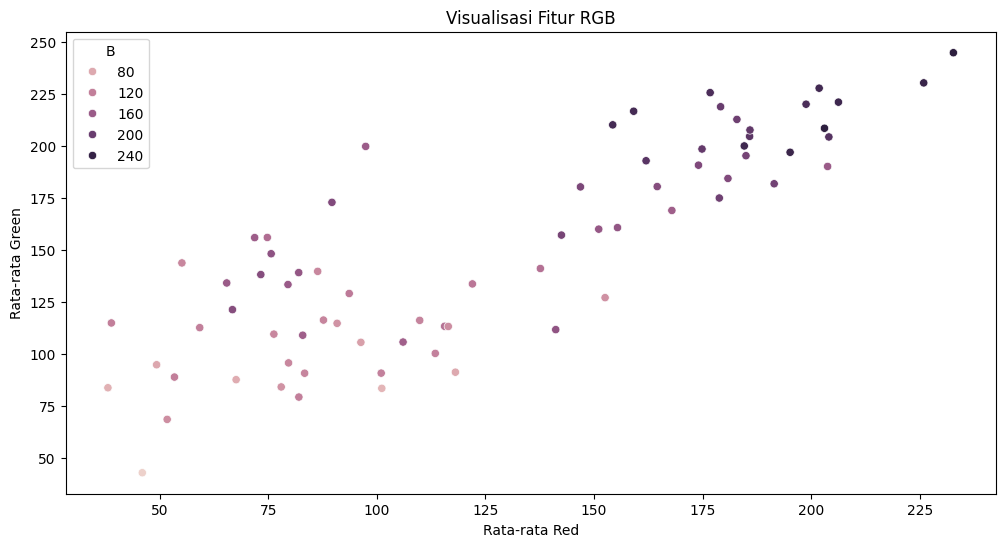

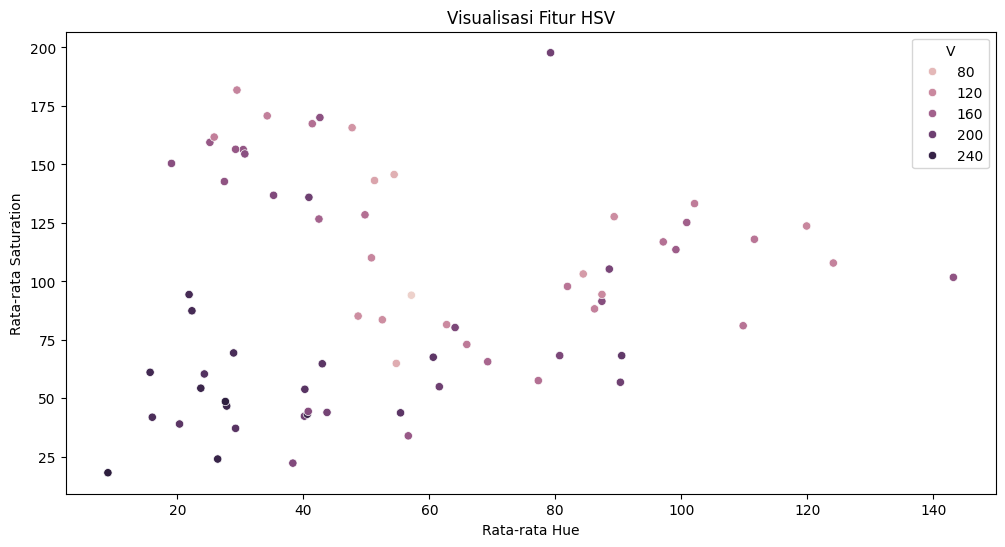

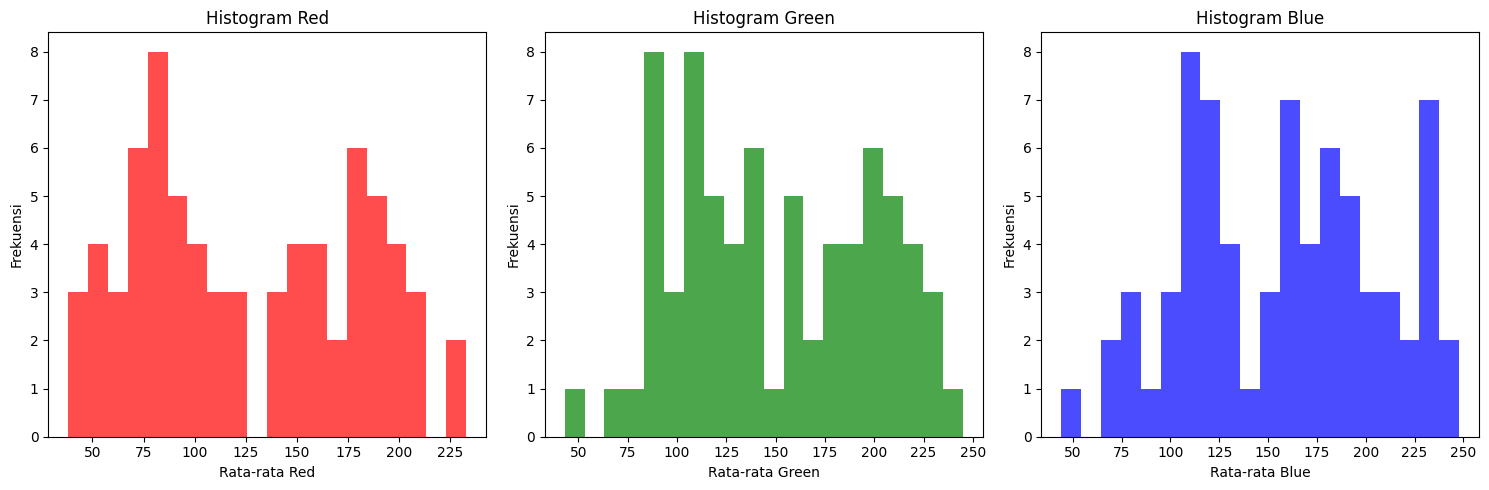

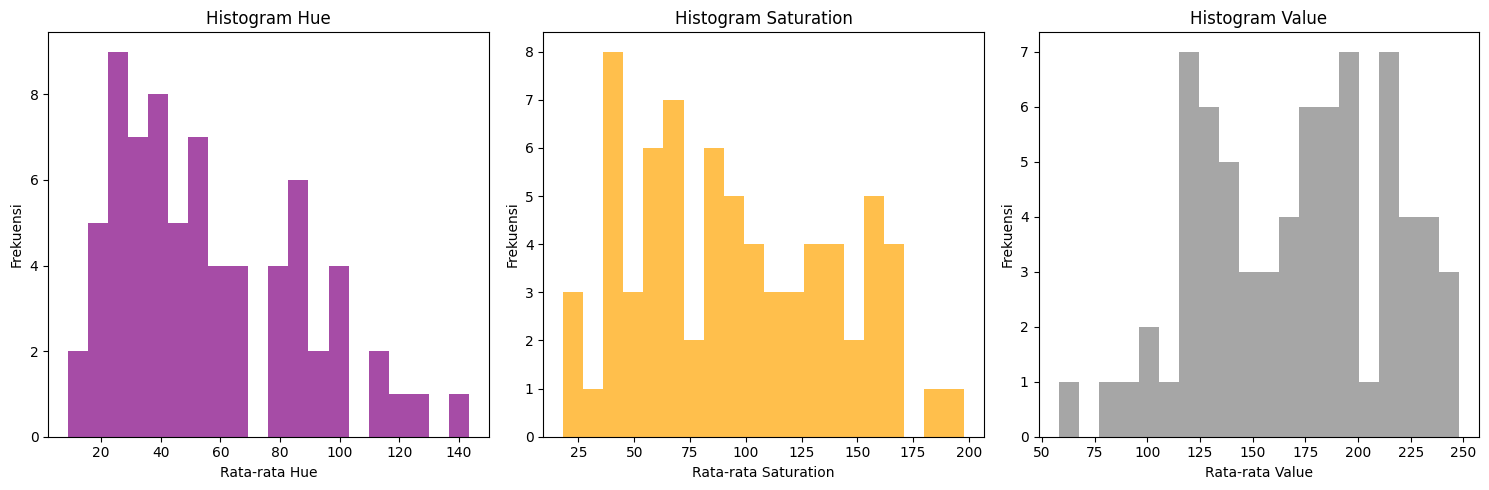

In [21]:
# Visualisasi Fitur RGB
plt.figure(figsize=(12, 6))
sns.scatterplot(x='R', y='G', hue='B', data=fitur_df)
plt.title('Visualisasi Fitur RGB')
plt.xlabel('Rata-rata Red')
plt.ylabel('Rata-rata Green')
plt.show()

# Visualisasi Fitur HSV
plt.figure(figsize=(12, 6))
sns.scatterplot(x='H', y='S', hue='V', data=fitur_df)
plt.title('Visualisasi Fitur HSV')
plt.xlabel('Rata-rata Hue')
plt.ylabel('Rata-rata Saturation')
plt.show()

# Histogram Fitur RGB
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(fitur_df['R'], bins=20, color='red', alpha=0.7)
plt.xlabel('Rata-rata Red')
plt.ylabel('Frekuensi')
plt.title('Histogram Red')

plt.subplot(1, 3, 2)
plt.hist(fitur_df['G'], bins=20, color='green', alpha=0.7)
plt.xlabel('Rata-rata Green')
plt.ylabel('Frekuensi')
plt.title('Histogram Green')

plt.subplot(1, 3, 3)
plt.hist(fitur_df['B'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Rata-rata Blue')
plt.ylabel('Frekuensi')
plt.title('Histogram Blue')

plt.tight_layout()
plt.show()

# Histogram Fitur HSV
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(fitur_df['H'], bins=20, color='purple', alpha=0.7)
plt.xlabel('Rata-rata Hue')
plt.ylabel('Frekuensi')
plt.title('Histogram Hue')

plt.subplot(1, 3, 2)
plt.hist(fitur_df['S'], bins=20, color='orange', alpha=0.7)
plt.xlabel('Rata-rata Saturation')
plt.ylabel('Frekuensi')
plt.title('Histogram Saturation')

plt.subplot(1, 3, 3)
plt.hist(fitur_df['V'], bins=20, color='gray', alpha=0.7)
plt.xlabel('Rata-rata Value')
plt.ylabel('Frekuensi')
plt.title('Histogram Value')

plt.tight_layout()
plt.show()


#Labelling

In [22]:
# Load data fitur dari file CSV
fitur_df = pd.read_csv("fitur_anggur.csv")

# Tambahkan kolom 'label' ke DataFrame
fitur_df['label'] = ''  # Inisialisasi dengan label kosong

# Loop melalui setiap baris DataFrame dan berikan label
# Ganti kondisi ini dengan logika yang sesuai untuk menentukan label
# Misalnya, jika nilai 'R' lebih dari 150, beri label 'segar'
for index, row in fitur_df.iterrows():
  if row['R'] > 150:
    fitur_df.at[index, 'label'] = 'segar'
  else:
    fitur_df.at[index, 'label'] = 'tidak segar'


# Simpan DataFrame yang telah diberi label ke file CSV baru
fitur_df.to_csv("fitur_anggur_labeled.csv", index=False)


#Pembagian Dataset

In [23]:

# Load data fitur yang telah diberi label
fitur_df = pd.read_csv("fitur_anggur_labeled.csv")

# Pisahkan fitur (X) dan label (y)
X = fitur_df[['R', 'G', 'B', 'H', 'S', 'V']]  # Ganti dengan kolom fitur yang sesuai
y = fitur_df['label']

# Bagi dataset menjadi data training dan data testing dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train dan y_train digunakan untuk melatih model
# X_test dan y_test digunakan untuk menguji model

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")


Jumlah data training: 57
Jumlah data testing: 15


#Klasifikasi KNN

In [24]:
# Inisialisasi model KNN dengan K=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Latih model dengan data training
knn_model.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred = knn_model.predict(X_test)

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model KNN dengan K=3: {accuracy}")


Akurasi model KNN dengan K=3: 0.8666666666666667


In [25]:
# Menguji model KNN dengan data uji
y_pred = knn_model.predict(X_test)

# Evaluasi kinerja model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy}")

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Matriks Konfusi
print("\nMatriks Konfusi:")
print(confusion_matrix(y_test, y_pred))


Akurasi model: 0.8666666666666667

Laporan Klasifikasi:
              precision    recall  f1-score   support

       segar       0.89      0.89      0.89         9
 tidak segar       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15


Matriks Konfusi:
[[8 1]
 [1 5]]


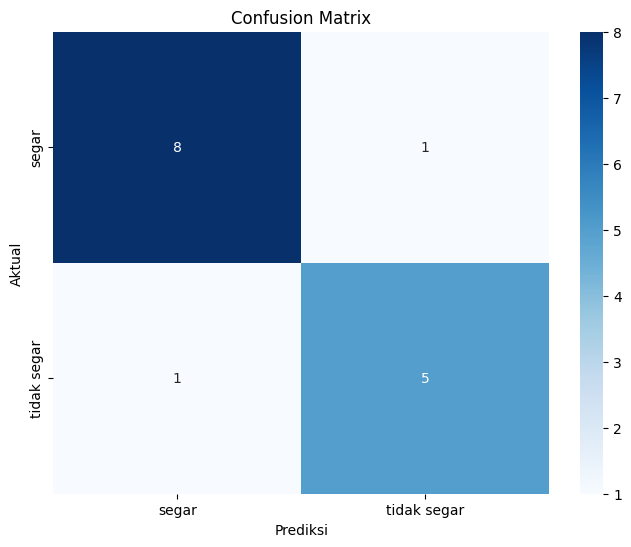

In [26]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix dengan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['segar', 'tidak segar'], yticklabels=['segar', 'tidak segar'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()
